# Inference Demo

Welcome to the Simple-DinoV2-Classification repository. This project provides an easy-to-use implementation of the DINOv2 model developed by Facebook, allowing you to train and classify images effectively. Harness the power of universal features for image-level and pixel-level visual tasks like image classification【7†source】. The DINOv2 model used in this project is originally developed by Facebook AI and can be found at facebookresearch/dinov2.

**Note: We are using a simple classifier trained on the flowers dataset to dempnstrate inference. You will need to train the model on your own dataset before you can start infering**

### Loading the required libraries

In [102]:
from model import Classifier

import torch
from torchvision import transforms
from tqdm.notebook import tqdm
from PIL import Image
import numpy as np
from IPython.display import display, HTML

import warnings
warnings.filterwarnings("ignore")

### General config

In [103]:
# Path to the test image
test_image = "examples/test.jpg"

# Path to the saved model weights
model_weights = "weights/saved_model.pt"

# List of class labels
classes = ['Daisy', 'Dandelion', 'Rose', 'Sunflower', 'Tulip']

# Number of classes
num_classes = len(classes)

# Device selection (CUDA GPU if available, otherwise CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### Loading the model and pretrained weights

In [104]:
# Create an instance of the classifier model
model = Classifier(num_classes)

# Load the pretrained weights into the model
model.load_state_dict(torch.load(model_weights))

# Set the model to evaluation mode (disable gradient computation)
model.eval()

# Move the model to the specified device (e.g., GPU)
model.to(device)

print("Model loaded successfully...")

Using cache found in C:\Users\pthakur/.cache\torch\hub\facebookresearch_dinov2_main


Model loaded successfully...


### Preprocessing 

In [105]:
# Define the image transformation pipeline
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),  # Randomly crop and resize the image to 224x224 pixels
    transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize the image tensor
])

# Function to preprocess an image
def preprocess(img_path):
    img = Image.open(img_path)  # Open the image file
    img = transform(img)  # Apply the defined transformation pipeline to the image
    img = img[None, :]  # Add a batch dimension to the image tensor
    return img  # Return the preprocessed image tensor

### Load the image and run inference

In [106]:
# Preprocess the test image
img = preprocess(test_image)

# Move the image to the device (e.g., GPU) for computation
img = img.to(device)

# Pass the preprocessed image through the model to get the result
result = model(img)

# Detach the result from the computation graph to avoid backpropagation
result = result.detach()

# Move the result to the CPU for further processing
result = result.cpu()

# Convert the result to a numpy array for easier manipulation
result = result.numpy()

# Find the index of the maximum value in the result array
result = np.argmax(result)

# Map the index to the corresponding class label
result = classes[result]

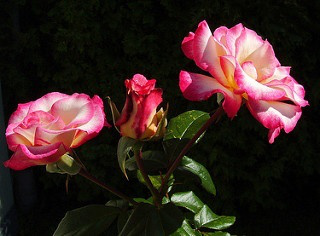

In [107]:
# Display the result using an HTML heading tag
display(HTML(f"<h1>{result}</h1>"))

# Open and display the original image
Image.open(test_image)